### Libraries

In [3]:
pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 9.6 MB/s eta 0:00:00:00:010:01

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [19]:
import os
import cv2
import numpy as np
import shutil
import matplotlib.pyplot as plt

### Load and Explore the dataset

In [5]:
# Define dataset paths
KDEF_train_stress_path = "/Users/rishithagolla/Downloads/Beyond_the_Smile/archive/KDEF/KDEF/Train/Stress"
KDEF_train_non_stress_path = "/Users/rishithagolla/Downloads/Beyond_the_Smile/archive/KDEF/KDEF/Train/NoStress"
KDEF_test_stress_path = "/Users/rishithagolla/Downloads/Beyond_the_Smile/archive/KDEF/KDEF/Test/Stress"
KDEF_test_non_stress_path = "/Users/rishithagolla/Downloads/Beyond_the_Smile/archive/KDEF/KDEF/Test/NoStress"

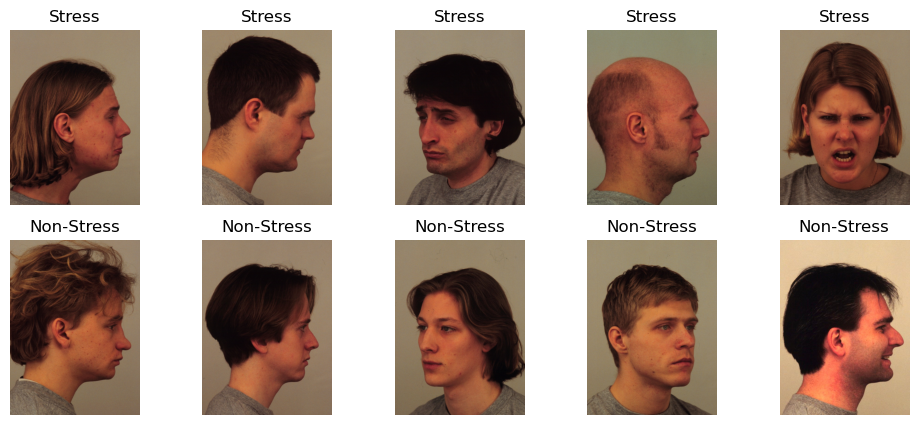

In [6]:
# Load sample images from each category
stress_images = os.listdir(KDEF_train_stress_path)[:5]
non_stress_images = os.listdir(KDEF_train_non_stress_path)[:5]

# Display sample images
fig, axes = plt.subplots(2, 5, figsize=(12, 5))

for i, img_name in enumerate(stress_images):
    img = cv2.imread(os.path.join(KDEF_train_stress_path, img_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    axes[0, i].imshow(img)
    axes[0, i].axis("off")
    axes[0, i].set_title("Stress")

for i, img_name in enumerate(non_stress_images):
    img = cv2.imread(os.path.join(KDEF_train_non_stress_path, img_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[1, i].imshow(img)
    axes[1, i].axis("off")
    axes[1, i].set_title("Non-Stress")

plt.show()


### Face Detection and Cropping

In [17]:
def detect_and_crop_face(image_path):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, (500, 500))  # Resize to a fixed width
    
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        face = img[y:y+h, x:x+w]  # Crop face region
        return cv2.resize(face, (224, 224))  # Resize to 224x224
    
    return None  # Return None if no face detected

# Test on a sample image
sample_image_path = os.path.join("/Users/rishithagolla/Downloads/Beyond_the_Smile/archive/KDEF/KDEF/Train/Stress/", stress_images[0])
cropped_face = detect_and_crop_face(os.path.join(KDEF_train_stress_path, stress_images[1]))

if cropped_face is not None:
    plt.imshow(cv2.cvtColor(cropped_face, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Cropped Face")
    plt.show()
else:
    print("No face detected!")


No face detected!


Decided not to do face detection and cropping because background is clear

### Preprocessed Images

In [18]:
# Image Preprocessing Function
def preprocess_and_save(image_path, save_path):
    img = cv2.imread(image_path)
    if img is None:
        return  # Skip unreadable images

    img = cv2.resize(img, (224, 224))  # Resize to 224x224
    img = img.astype("float32") / 255.0  # Normalize (0-1 range)

    # Save preprocessed image
    cv2.imwrite(save_path, (img * 255).astype(np.uint8))

# Process & Save Images
for img_path, label, split in zip([train_data, test_data], [train_labels, test_labels], ["train", "test"]):
    for i, img in enumerate(img_path):
        category = label[i]
        save_path = os.path.join(OUTPUT_FOLDER, split, category, os.path.basename(img))
        preprocess_and_save(img, save_path)

print("Preprocessing Complete! Images saved in 'processed_dataset' folder.")



Preprocessing Complete! Processed images saved.
